# N-Asset Efficient Frontier

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_ins as eri

ins30 = eri.get_ins_returns()
er = eri.annualize_rets(ins30["1996":"2000"],12)
cov = ins30["1996":"2000"].cov()

In [2]:
er

Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
Hshld    0.134766
Clths    0.079160
Hlth     0.246641
Chems    0.077456
Txtls   -0.042721
Cnstr    0.084076
Steel    0.115809
FabPr    0.108280
ElcEq    0.272420
Autos    0.080954
Carry    0.173904
Mines   -0.053554
Coal     0.414689
Oil      0.165377
Util     0.145903
Telcm    0.122771
Servs    0.175264
BusEq    0.271952
Paper    0.097163
Trans    0.071099
Whlsl    0.126431
Rtail    0.207247
Meals    0.067400
Fin      0.223371
Other    0.043349
dtype: float64

```python
def plot_ef(n_points,er,cov):
    """
    plots the N-asset efficient frontier
    """
    weights = MINIMIZE_VOL(target_return) ????
    rets = [portfolio_return(w,er) for w in weights]
    vols = [portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({
        "Returns":rets,
        "Volatility":vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=".-")

```

In [3]:
from scipy.optimize import minimize

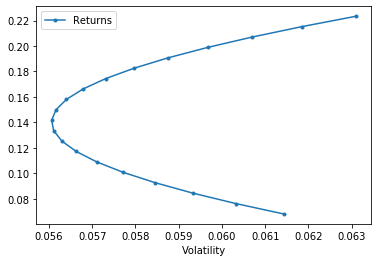

In [6]:
l = ["Games","Fin"]
eri.plot_ef2(20,er[l],cov.loc[l,l])

In [9]:
import numpy as np

def minimize_vol(target_return,er,cov):
    """
    target_return -> Weights Vector
    """
    n = er.shape[0] #figure out how many assets are there?
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n #get a tuple of n tuples((0,1),(0,1)...(0,1)) as a sequence of constraint for each weight
    #set the bounds for weights vector 
    return_is_target = {
        'type':'eq',
        'args':(er,),
        'fun': lambda weights,er:target_return - eri.portfolio_return(weights,er)
    } #weights and er are the arguments of lambda function, remember we want the difference so the target return is met. 
    #set constriants on the target returns equal to the portfolio returns
    weights_sum_to_1 = {
        'type':'eq',
        'fun':lambda weights: np.sum(weights)-1   
    }#set constraints that the weights sun to 1
    
    results = minimize(eri.portfolio_vol,init_guess,
                       args=(cov,),method="SLSQP",
                       options={'disp':False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                      ) #return to the weights that satisfy all the bounds and constraints that we have coded
    return results.x

In [7]:
l

['Games', 'Fin']

In [10]:
w15 = minimize_vol(0.15,er[l],cov.loc[l,l]) #find a weights with a target return of 15% in the portfolio
vol15 = eri.portfolio_vol(w15,cov.loc[l,l])
vol15

0.056163669406706564

In [11]:
w15 #if you put the 0.47 and 0.53 in the portfolio, we will get 15% expected reuturn with minimize vol 

array([0.47287631, 0.52712369])

In [11]:
w15 = eri.minimize_vol(0.15,er[l],cov.loc[l,l])
vol15 = eri.portfolio_vol(w15,cov.loc[l,l])
vol15

0.056163669406706564

In [12]:
import pandas as pd
def optimal_weights(n_points,er,cov):
    """
    -> list of weights to run the optimizer on to minimize the vol
    """
    target_rets = np.linspace(er.min(),er.max(),n_points)
    weights = [minimize_vol(target_return,er,cov) for target_return in target_rets]
    return weights

def plot_ef(n_points,er,cov):
    """
    plots the multi-asset efficient frontier
    """
    weights = optimal_weights(n_points,er,cov)
    rets = [eri.portfolio_return(w,er) for w in weights]
    vols = [eri.portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({
        "Returns":rets,
        "Volatility":vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=".-")


In [16]:
er[l]

Games    0.068212
Fin      0.223371
dtype: float64

In [15]:
optimal_weights(10,er[l],cov.loc[l,l])

[array([1., 0.]),
 array([0.88888889, 0.11111111]),
 array([0.77777778, 0.22222222]),
 array([0.66666667, 0.33333333]),
 array([0.55555556, 0.44444444]),
 array([0.44444444, 0.55555556]),
 array([0.33333333, 0.66666667]),
 array([0.22222222, 0.77777778]),
 array([0.11111111, 0.88888889]),
 array([0., 1.])]

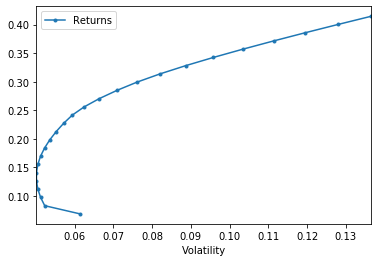

In [14]:
l = ["Smoke", "Fin", "Games", "Coal"]
plot_ef(25,er[l],cov.loc[l,l])

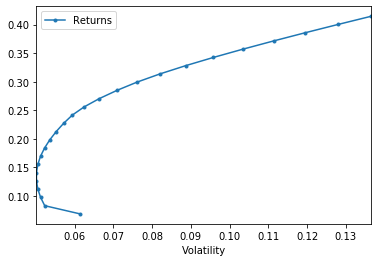

In [15]:
l = ["Smoke", "Fin", "Games", "Coal"]
eri.plot_ef(25,er[l],cov.loc[l,l])